<h3>Estágio em Dados - Itaú Unibanco - Desafio
<h3>
Código desenvolvido por : Lucca Machado da Silva    

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, DeprecationWarning))

In [80]:
#Carregando o arquivo CSV para um DataFrame
df = pd.read_csv('Ecommerce_DBS.csv')

In [81]:
#Verificando os dados inicais do DataFrame
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,10/08/2023,Clothing,279,2,2187,1,55,Male,SEM,United States,Indiana,39.849426,-86.258278
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign,Canada,Quebec,53.000000,-70.000000
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign,United States,Indiana,39.849426,-86.258278
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign,Canada,New Brunswick,46.498390,-66.159668


In [82]:
#Obtendo informações gerais sobre o conjunto de dados, através disso é possível verificar que não temos missing values
#e os tipos dos dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   NPS                    250000 non-null  int64  
 7   Customer Age           250000 non-null  int64  
 8   Gender                 250000 non-null  object 
 9   Source                 250000 non-null  object 
 10  Country                250000 non-null  object 
 11  State                  250000 non-null  object 
 12  Latitude               250000 non-null  float64
 13  Longituide             250000 non-null  float64
dtypes: float64(2), int64(6), object(6)
m

In [83]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Latitude,Longituide
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,4.991832,43.759228,42.400790,-81.648522
std,14428.27959,141.568577,1.414694,1442.933565,3.166732,15.392075,7.214608,37.339110
min,1.00000,10.000000,1.000000,100.000000,0.000000,18.000000,31.169546,-127.647621
25%,12497.75000,132.000000,2.000000,1477.000000,2.000000,30.000000,36.116203,-106.000000
50%,25018.00000,255.000000,3.000000,2724.000000,5.000000,44.000000,42.165726,-74.948051
75%,37506.00000,377.000000,4.000000,3974.000000,8.000000,57.000000,46.250000,-74.948051
max,50000.00000,500.000000,5.000000,5350.000000,10.000000,70.000000,56.415211,98.739075


In [84]:
#Verificando todas as chaves
df.keys()

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age ', 'Gender',
       'Source', 'Country', 'State', 'Latitude', 'Longituide'],
      dtype='object')

In [85]:
#A chave 'Customer Age ' possui um espaço no final, então vamos remover esse espaço para padronizar
df.rename(columns={'Customer Age ': 'Customer Age'}, inplace=True)

In [86]:
#Confirmando que a mudaça foi realizada
df.keys()

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age', 'Gender',
       'Source', 'Country', 'State', 'Latitude', 'Longituide'],
      dtype='object')

In [87]:
#Verificando por duplicatas, neste caso, não possuimos duplicatas para limpar
df.duplicated().sum()

0

# Qual os produtos mais vendidos considerando os últimos 3 anos ?

In [88]:
df_first_answer = df.copy() #Criando uma cópia para responder a prgunta
df_first_answer['Purchase Date'] = pd.to_datetime(df_first_answer['Purchase Date'],format='%d/%m/%Y') #Transformando a data de str para datetime
df_first_answer = df_first_answer[df_first_answer['Purchase Date'] > '30/05/2021'] #Filtrando para datas maiores que 30/05/2021 (dia da resposta)
produtos_vendidos = df_first_answer.groupby('Product Category')['Quantity'].sum() #Agrupando por categoria e somando as quantities

In [89]:
produtos_vendidos

Product Category
Books          138605
Clothing       139637
Electronics     92480
Home            91856
Name: Quantity, dtype: int64

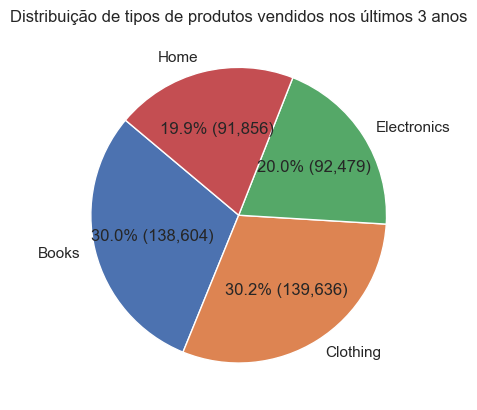

In [90]:
total_sales = produtos_vendidos.sum()
def autopct_with_amount(pct):
    return f"{pct:.1f}% ({int(pct/100 * total_sales):,})"  
plt.pie(produtos_vendidos, labels=produtos_vendidos.index, autopct=autopct_with_amount, startangle=140)
plt.title("Distribuição de tipos de produtos vendidos nos últimos 3 anos")
plt.show()

# Qual o produto mais caro e o mais barato ?

In [91]:
df_second_answer = df.copy()

In [92]:
most_expensive = df_second_answer.groupby('Product Category')['Product Price'].max()
cheaper = df_second_answer.groupby('Product Category')['Product Price'].min()
most_expensive = most_expensive.reset_index()
cheaper = cheaper.reset_index()
most_expensive.rename(columns={'Product Price': 'Mais caro'}, inplace=True)
cheaper.rename(columns={'Product Price': 'Mais barato'}, inplace=True)
df_second_answer = pd.merge(most_expensive, cheaper, on='Product Category')

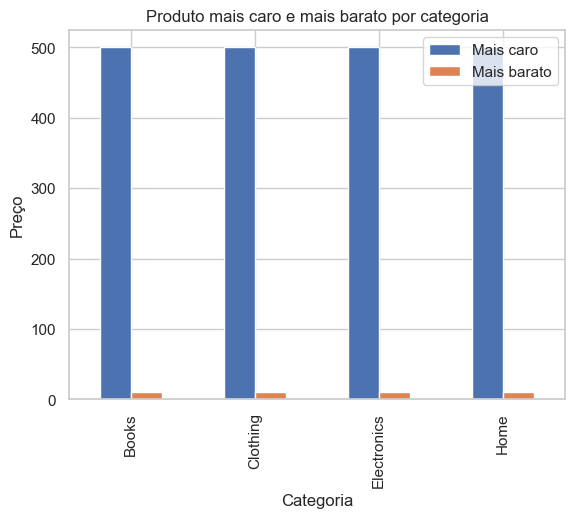

In [93]:
df_second_answer.plot(x='Product Category', kind='bar')
plt.title('Produto mais caro e mais barato por categoria')
plt.ylabel('Preço')
plt.xlabel('Categoria')
plt.show()

# Qual a categoria de produto mais vendida e a menos vendida? Qual categoria mais e menos cara?

In [94]:
df_third_answer = df.copy()
sales = df_third_answer.groupby('Product Category')['Quantity'].sum()
sales = sales.reset_index()
sales = sales.sort_values(by='Quantity')
sales = sales.reset_index(drop=True)
sales = sales.iloc[[0, -1], :]

In [95]:
sales

,Product Category,Quantity
0,Home,149698
3,Clothing,225322


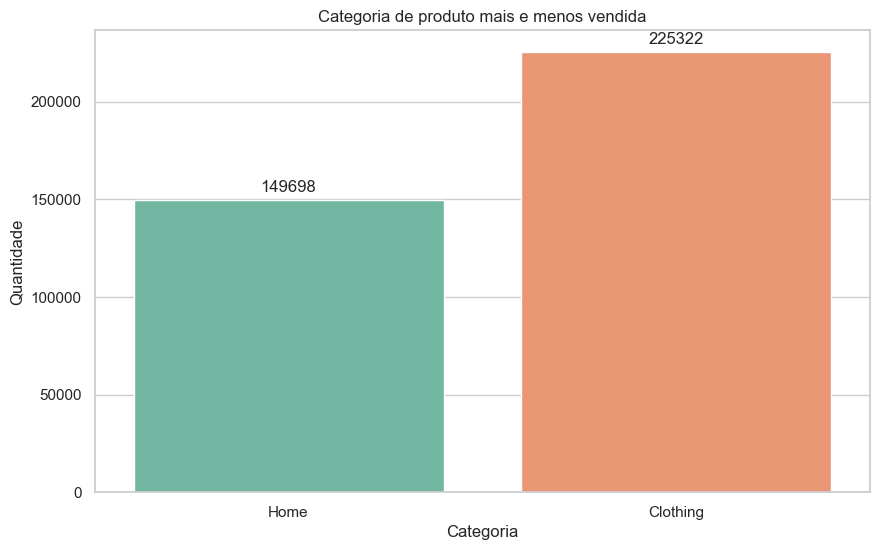

In [96]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Product Category', y='Quantity', data=sales,palette='Set2')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    
plt.title('Categoria de produto mais e menos vendida')
plt.ylabel('Quantidade')
plt.xlabel('Categoria')
plt.show()

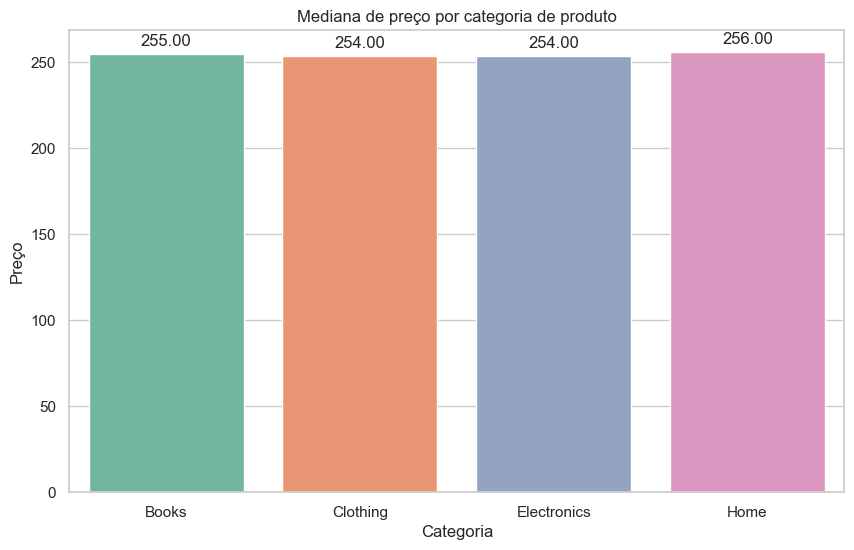

In [97]:
#Extraindo a mediana de preço de produto por cada categoria
median_prices = df_third_answer.groupby('Product Category')['Product Price'].median()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

plot = sns.barplot(x=median_prices.index, y=median_prices,palette='Set2')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    
plt.title('Mediana de preço por categoria de produto')
plt.ylabel('Preço')
plt.xlabel('Categoria')
plt.show()

# Qual o produto com melhor e pior NPS?

In [98]:
df_forth_answer = df.copy()

mean_nps = df_forth_answer.groupby('Product Category')['NPS'].mean()


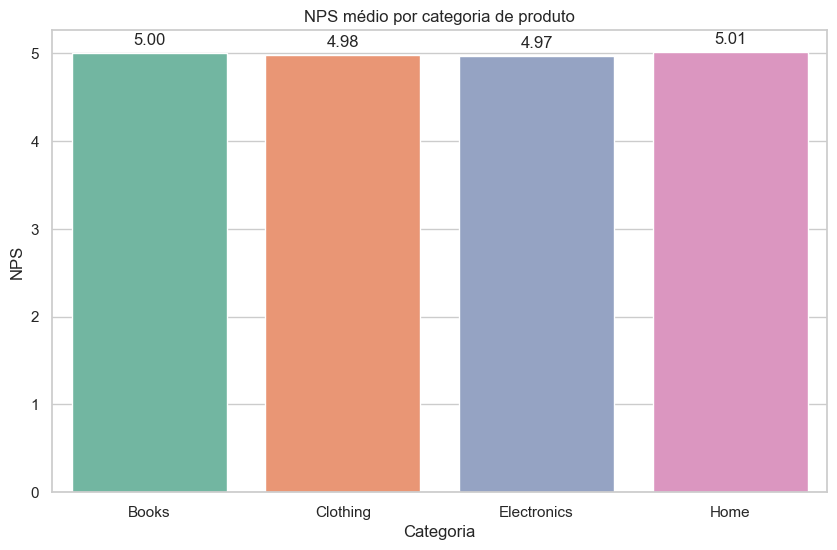

In [99]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=mean_nps.index, y=mean_nps, palette='Set2')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('NPS médio por categoria de produto')
plt.ylabel('NPS')
plt.xlabel('Categoria')
plt.show()

<h1> Resolução do desafio

Pensando no melhor tipo de solução possível, não se pode levar em consideração apenas os dados de gênero, idade, fonte e categoria de produto, pois o valor gasto também é um fator extremamente importante. Portanto, foram utilizadas as colunas 'Product Category', 'Customer Age', 'Gender', 'Source' e 'Total Purchase Amount' para responder ao desafio.

In [100]:
#Selecionando e renomeando as colunas que serão mantidas
colunas_a_serem_mantidas = ['Product Category','Customer Age','Gender','Source', 'Total Purchase Amount']
df = df[colunas_a_serem_mantidas]
df.rename(columns={'Total Purchase Amount': 'Total_Purchase_Amount'}, inplace=True)
df.rename(columns={'Product Category': 'Product_Category'}, inplace=True)
df.rename(columns={'Customer Age': 'Customer_Age'}, inplace=True)


C:\Users\lucca\AppData\Local\Temp\ipykernel_19148\1909514480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Total Purchase Amount': 'Total_Purchase_Amount'}, inplace=True)
C:\Users\lucca\AppData\Local\Temp\ipykernel_19148\1909514480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Product Category': 'Product_Category'}, inplace=True)
C:\Users\lucca\AppData\Local\Temp\ipykernel_19148\1909514480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [101]:
#Separando o dataset em 4 datasets diferentes, um para cada categoria de produto

compradores_electronics = df[df['Product_Category'] == 'Electronics'] #Filtrando os compradores de eletrônicos
compradores_electronics = compradores_electronics.drop(columns='Product_Category') #Removendo a coluna 'Product Category'
compradores_electronics.reset_index(drop=True, inplace=True) #Resetando o índice

compradores_home = df[df['Product_Category'] == 'Home']
compradores_home = compradores_home.drop(columns='Product_Category')
compradores_home.reset_index(drop=True, inplace=True)

compradores_clothing = df[df['Product_Category'] == 'Clothing']
compradores_clothing = compradores_clothing.drop(columns='Product_Category') 
compradores_clothing.reset_index(drop=True, inplace=True)

compradores_books = df[df['Product_Category'] == 'Books']
compradores_books = compradores_books.drop(columns='Product_Category')
compradores_books.reset_index(drop=True, inplace=True)

In [102]:
#esta função é responsável pela separação em faixas etárias, neste caso, de 18 até 67 anos, com intervalos de 10 anos
def separate_in_age_group(df):
    bins = list(range(18, 69, 10)) + [100]
    labels = [f"{i}-{i+9}" for i in range(18, 67, 10)] + ["68+"]
    df['age_group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)
    df.drop(columns='Customer_Age', inplace=True) #Removendo a coluna de idade, agora desnecessária

In [103]:
separate_in_age_group(compradores_electronics)
separate_in_age_group(compradores_home)
separate_in_age_group(compradores_clothing)
separate_in_age_group(compradores_books)

In [104]:
def agrupar_age_groups(df):
    std_price_quantity = df.groupby(['age_group','Source'])['Total_Purchase_Amount'].median().reset_index()
    source_counts = df.groupby(['age_group','Source',]).size().reset_index(name='Source_Count')
    df = pd.merge(std_price_quantity, source_counts, on=['age_group','Source'])
    return df

# Testes de Hipóteses

### Primeira Hipótese: Não existe diferença significativa do Total_Purchase_Amount entre os gêneros

**Hipótese nula:** Não existe diferença significativa do Total_Purchase_Amount entre os gêneros.

**Hipótese alternativa:** Existe diferença significativa do Total_Purchase_Amount entre os gêneros.


### Segunda Hipótese: Não existe diferença significativa do Total_Purchase_Amount entre as diferentes sources

**Hipótese nula:** Não existe diferença significativa do Total_Purchase_Amount entre as diferentes sources.

**Hipótese alternativa:** Existe diferença significativa do Total_Purchase_Amount entre as diferentes sources.

### Terceira Hipótese: Não existe diferença significativa do Total_Purchase_Amount entre as diferentes faixas etárias

**Hipótese nula:** Não existe diferença significativa do Total_Purchase_Amount entre as diferentes faixas etárias.

**Hipótese alternativa:** Existe diferença significativa do Total_Purchase_Amount entre as diferentes faixas etárias.

### Quarta Hipótese: Existe um grupo ideal (considerando idade e origem de compra) para a venda de um determinado tipo de produto visando obter o maior valor de venda possível

**Hipótese nula:** Não existe um grupo que forneça o melhor valor de venda possível em relação aos outros.

**Hipótese alternativa:** Existe um grupo que forneça o melhor maior valor de venda possível em relação aos outros.

**Abordagem:** Para a realização desta hipótese, iremos agrupar os dados por faixa etária e por origem, além disso, somar a quantidade total de compras pertencentes aquele grupo e extrair a mediana do valor total gasto por aquele grupo.

Para a análise das hipóteses para todos os tipos de produtos, será utilizada a tabela ANOVA. Nela, a coluna PR(>F) indica o nosso p-value, que, quando menor que 0.05, indica fortemente uma rejeição de hipótese nula, ou seja, para valores de p muito baixos isso indica uma grande aderência a hipótese alternativa.

### Análise de hipóteses para livros

In [105]:
livros_hypothesis = 'Total_Purchase_Amount ~ Gender + Source + age_group'
model_livros_hypothesis  = ols(livros_hypothesis, data=compradores_books).fit()
#Criando um modelo linear para a hipótese

In [106]:
anova_table_livros = sm.stats.anova_lm(model_livros_hypothesis, typ=2)

In [107]:
anova_table_livros #usado para as hipóteses 1,2 e 3

,sum_sq,df,F,PR(>F)
Gender,5.243645e+03,1.0,0.002521,9.599547e-01
Source,1.248526e+07,3.0,2.000938,1.114832e-01
age_group,4.232887e+08,5.0,40.702767,5.751888e-42
Residual,1.557888e+11,74902.0,NaN,NaN


In [108]:
compradores_books.groupby(['Gender'])['Total_Purchase_Amount'].median().reset_index()

,Gender,Total_Purchase_Amount
0,Female,2742.0
1,Male,2740.0


In [109]:
compradores_books.groupby(['Source'])['Total_Purchase_Amount'].median().reset_index()

,Source,Total_Purchase_Amount
0,FaceBook campaign,2755.0
1,Instagram Campign,2714.0
2,Organic Search,2708.0
3,SEM,2780.5


In [110]:
compradores_books.groupby(['age_group'])['Total_Purchase_Amount'].median().reset_index()

,age_group,Total_Purchase_Amount
0,18-27,2650.5
1,28-37,2667.0
2,38-47,2739.0
3,48-57,2794.5
4,58-67,2839.0
5,68+,2847.5


In [111]:
livros_agrupados = agrupar_age_groups(compradores_books)
livros_agrupados['Rate'] = livros_agrupados['Total_Purchase_Amount'] * livros_agrupados['Source_Count']
livros_agrupados.drop(columns=['Source_Count','Total_Purchase_Amount'], inplace=True)

In [112]:
livros_agrupados

,age_group,Source,Rate
0,18-27,FaceBook campaign,10258358.0
1,18-27,Instagram Campign,10705810.0
2,18-27,Organic Search,7120022.0
3,18-27,SEM,10545219.0
4,28-37,FaceBook campaign,10131810.0
5,28-37,Instagram Campign,10356948.0
6,28-37,Organic Search,6624624.0
7,28-37,SEM,10434600.0
8,38-47,FaceBook campaign,10480059.0
9,38-47,Instagram Campign,10877580.0


In [113]:
#Quarta hipótese
livros4_hypothesis = 'Rate ~ Source + age_group'
model_livros4_hypothesis  = ols(livros4_hypothesis, data=livros_agrupados).fit()
#Criando um modelo linear para a hipótese
anova_table_livros4 = sm.stats.anova_lm(model_livros4_hypothesis, typ=2)

In [114]:
anova_table_livros4

,sum_sq,df,F,PR(>F)
Source,4.353113e+13,3.0,57.310946,1.896154e-08
age_group,1.462598e+14,5.0,115.535040,1.989666e-11
Residual,3.797803e+12,15.0,NaN,NaN


In [115]:
livros_agrupados[['Rate']] = scaler.fit_transform(livros_agrupados[['Rate']])
livros_agrupados = livros_agrupados.sort_values(by='Rate', ascending=False)

In [116]:
livros_agrupados.head()

,age_group,Source,Rate
17,58-67,Instagram Campign,1.000000
9,38-47,Instagram Campign,0.989455
16,58-67,FaceBook campaign,0.979587
1,18-27,Instagram Campign,0.969883
11,38-47,SEM,0.964523


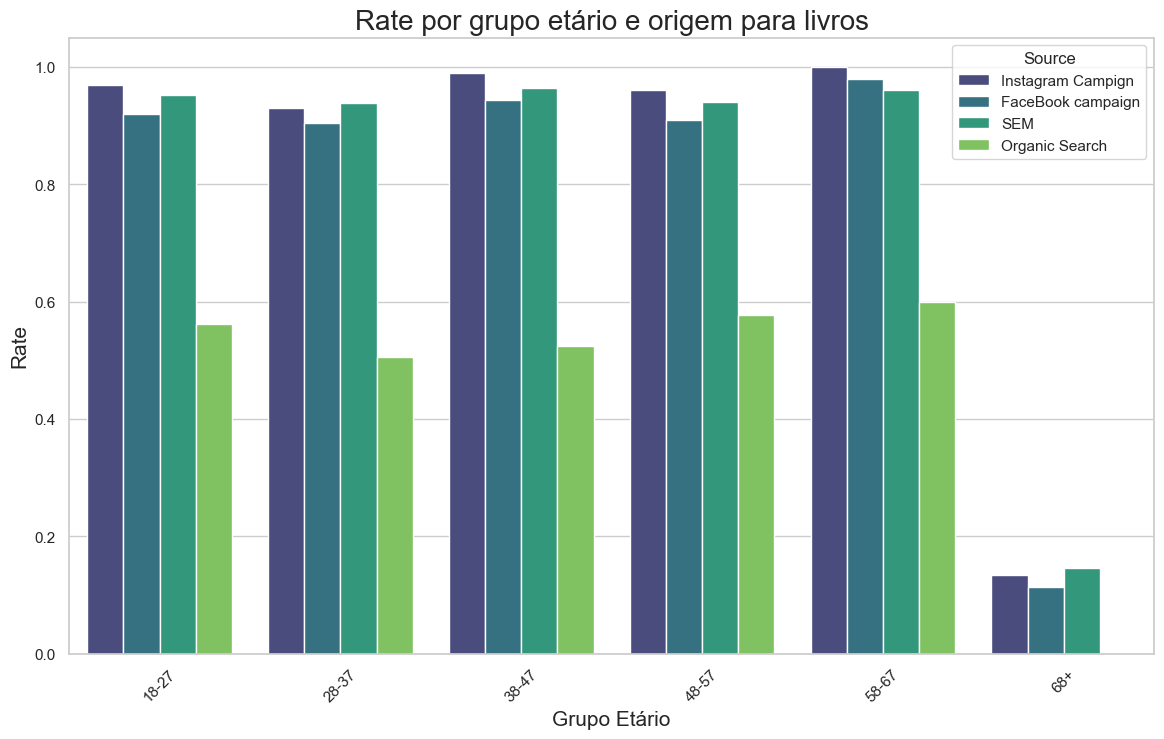

In [117]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
chart = sns.barplot(
    x="age_group", 
    y="Rate", 
    hue="Source", 
    data=livros_agrupados, 
    palette="viridis"
)

chart.set_title('Rate por grupo etário e origem para livros', fontsize=20)
chart.set_xlabel('Grupo Etário', fontsize=15)
chart.set_ylabel('Rate', fontsize=15)

plt.xticks(rotation=45)
plt.show()

### Análise de hipóteses para eletrônicos

In [118]:
eletronicos_hypothesis = 'Total_Purchase_Amount ~ Gender + Source + age_group'
model_eletronicos_hypothesis  = ols(eletronicos_hypothesis, data=compradores_electronics).fit()
#Criando um modelo linear para a hipótese

In [119]:
anova_table_eletronicos = sm.stats.anova_lm(model_eletronicos_hypothesis, typ=2)

In [120]:
anova_table_eletronicos

,sum_sq,df,F,PR(>F)
Gender,2.428453e+06,1.0,1.175108,2.783593e-01
Source,4.439902e+06,3.0,0.716144,5.421819e-01
age_group,3.421858e+08,5.0,33.116167,7.291894e-34
Residual,1.036906e+11,50175.0,NaN,NaN


In [121]:
compradores_electronics.groupby(['Gender'])['Total_Purchase_Amount'].median().reset_index()

,Gender,Total_Purchase_Amount
0,Female,2715.0
1,Male,2719.0


In [122]:
compradores_electronics.groupby(['Source'])['Total_Purchase_Amount'].median().reset_index()

,Source,Total_Purchase_Amount
0,FaceBook campaign,2719.5
1,Instagram Campign,2737.0
2,Organic Search,2689.0
3,SEM,2713.0


In [123]:
compradores_electronics.groupby(['age_group'])['Total_Purchase_Amount'].median().reset_index()

,age_group,Total_Purchase_Amount
0,18-27,2591.0
1,28-37,2652.0
2,38-47,2734.0
3,48-57,2749.5
4,58-67,2835.0
5,68+,2817.0


In [124]:
eletronicos_agrupados = agrupar_age_groups(compradores_electronics)
eletronicos_agrupados['Rate'] = eletronicos_agrupados['Total_Purchase_Amount'] * eletronicos_agrupados['Source_Count']
eletronicos_agrupados.drop(columns=['Source_Count','Total_Purchase_Amount'], inplace=True)

In [125]:
#Quarta hipótese
eletronicos4_hypothesis = 'Rate ~ Source + age_group'
model_eletronicos4_hypothesis  = ols(eletronicos4_hypothesis, data=eletronicos_agrupados).fit()
#Criando um modelo linear para a hipótese
anova_table_eletronicos4 = sm.stats.anova_lm(model_eletronicos4_hypothesis, typ=2)

In [126]:
anova_table_eletronicos4

,sum_sq,df,F,PR(>F)
Source,2.043576e+13,3.0,46.961543,7.347980e-08
age_group,6.417597e+13,5.0,88.486126,1.374210e-10
Residual,2.175798e+12,15.0,NaN,NaN


In [127]:
eletronicos_agrupados[['Rate']] = scaler.fit_transform(eletronicos_agrupados[['Rate']])
eletronicos_agrupados = eletronicos_agrupados.sort_values(by='Rate', ascending=False)

In [128]:
eletronicos_agrupados.head()

,age_group,Source,Rate
1,18-27,Instagram Campign,1.000000
17,58-67,Instagram Campign,0.972508
13,48-57,Instagram Campign,0.946990
9,38-47,Instagram Campign,0.927762
16,58-67,FaceBook campaign,0.923752


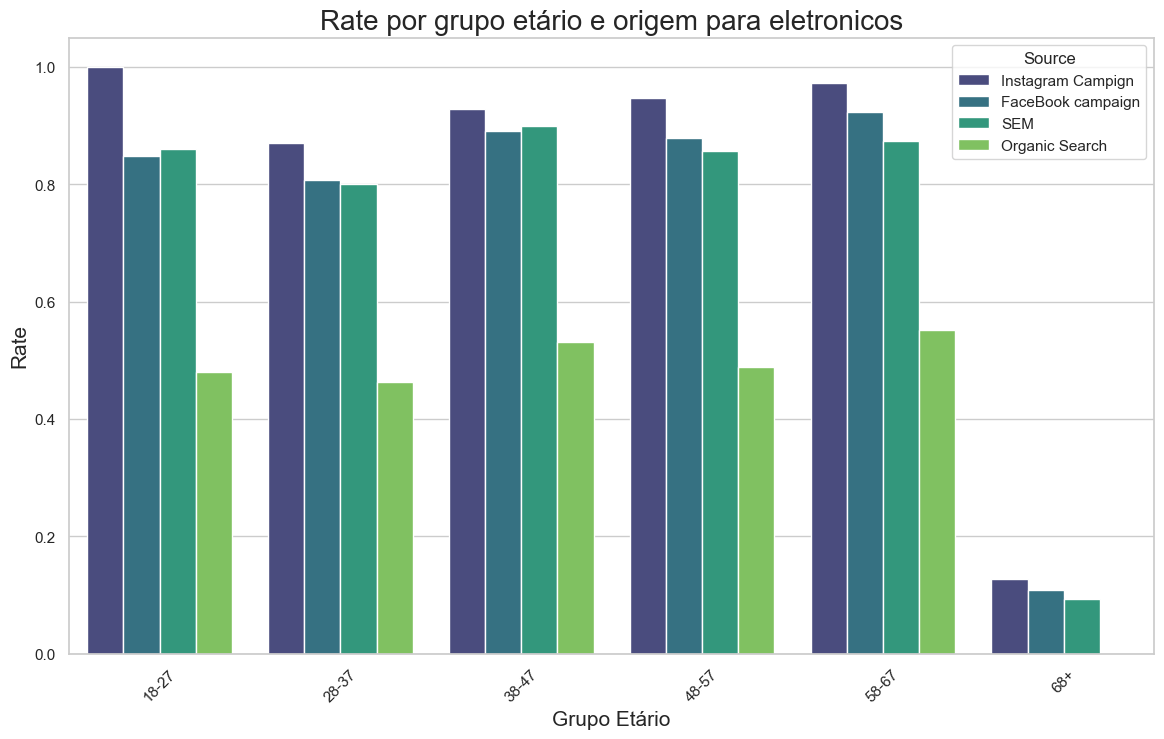

In [129]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
chart = sns.barplot(
    x="age_group", 
    y="Rate", 
    hue="Source", 
    data=eletronicos_agrupados, 
    palette="viridis"
)

chart.set_title('Rate por grupo etário e origem para eletronicos', fontsize=20)
chart.set_xlabel('Grupo Etário', fontsize=15)
chart.set_ylabel('Rate', fontsize=15)

plt.xticks(rotation=45)
plt.show()

### Análise de hipóteses para produtos home

In [130]:
home_hypothesis = 'Total_Purchase_Amount ~ Gender + Source + age_group'
model_home_hypothesis  = ols(home_hypothesis, data=compradores_home).fit()
#Criando um modelo linear para a hipótese

In [131]:
anova_table_home = sm.stats.anova_lm(model_home_hypothesis, typ=2)

In [132]:
anova_table_home

,sum_sq,df,F,PR(>F)
Gender,1.311749e+06,1.0,0.634774,4.256134e-01
Source,8.316743e+06,3.0,1.341530,2.588341e-01
age_group,2.948279e+08,5.0,28.534282,5.335175e-29
Residual,1.029955e+11,49841.0,NaN,NaN


In [133]:
compradores_home.groupby(['Gender'])['Total_Purchase_Amount'].median().reset_index()

,Gender,Total_Purchase_Amount
0,Female,2714.0
1,Male,2700.0


In [134]:
compradores_home.groupby(['Source'])['Total_Purchase_Amount'].median().reset_index()

,Source,Total_Purchase_Amount
0,FaceBook campaign,2682.0
1,Instagram Campign,2726.5
2,Organic Search,2725.5
3,SEM,2694.0


In [135]:
compradores_home.groupby(['age_group'])['Total_Purchase_Amount'].median().reset_index()

,age_group,Total_Purchase_Amount
0,18-27,2596.0
1,28-37,2678.0
2,38-47,2683.0
3,48-57,2770.0
4,58-67,2790.0
5,68+,2875.0


In [136]:
home_agrupados = agrupar_age_groups(compradores_home)
home_agrupados['Rate'] = home_agrupados['Total_Purchase_Amount'] * home_agrupados['Source_Count']
home_agrupados.drop(columns=['Source_Count','Total_Purchase_Amount'], inplace=True)

In [137]:
#Quarta hipótese
home4_hypothesis = 'Rate ~ Source + age_group'
model_home4_hypothesis  = ols(home4_hypothesis, data=home_agrupados).fit()
#Criando um modelo linear para a hipótese
anova_table_home4 = sm.stats.anova_lm(model_home4_hypothesis, typ=2)

In [138]:
anova_table_home4

,sum_sq,df,F,PR(>F)
Source,1.618361e+13,3.0,45.308452,9.350021e-08
age_group,6.087343e+13,5.0,102.254600,4.829952e-11
Residual,1.785937e+12,15.0,NaN,NaN


In [139]:
home_agrupados[['Rate']] = scaler.fit_transform(home_agrupados[['Rate']])
home_agrupados = home_agrupados.sort_values(by='Rate', ascending=False)

In [140]:
home_agrupados.head()

,age_group,Source,Rate
13,48-57,Instagram Campign,1.000000
1,18-27,Instagram Campign,0.996455
17,58-67,Instagram Campign,0.962607
9,38-47,Instagram Campign,0.954763
12,48-57,FaceBook campaign,0.946287


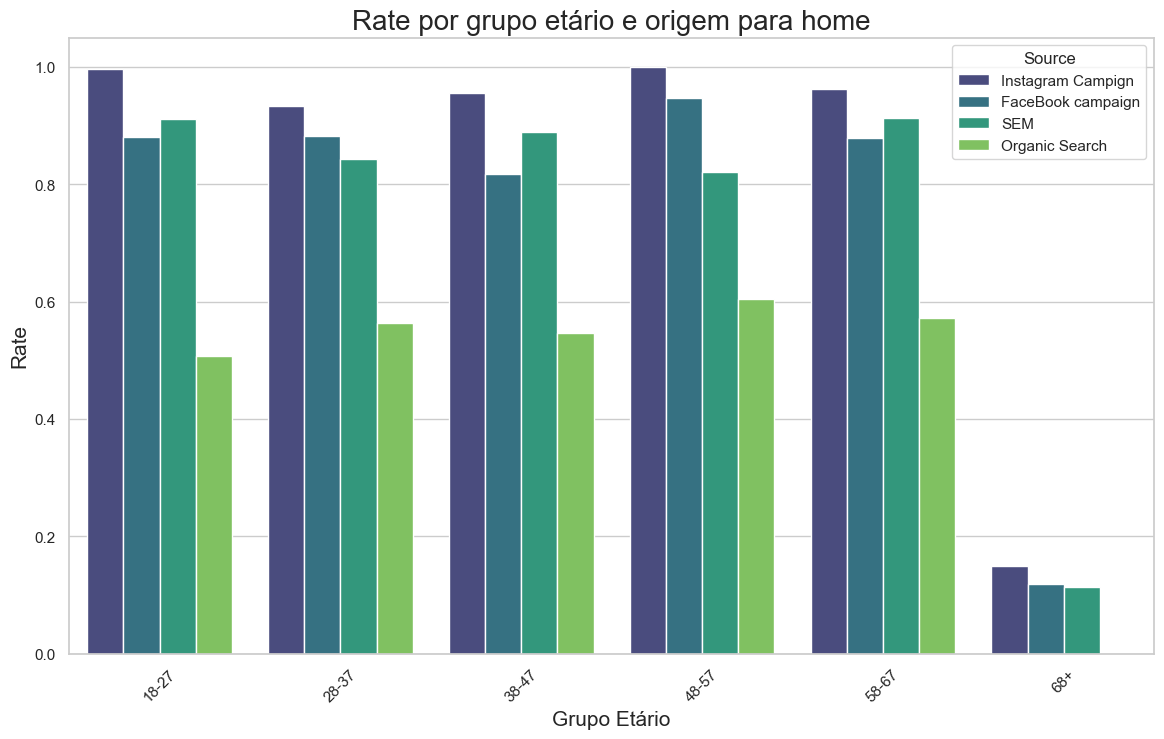

In [141]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
chart = sns.barplot(
    x="age_group", 
    y="Rate", 
    hue="Source", 
    data=home_agrupados, 
    palette="viridis"
)

chart.set_title('Rate por grupo etário e origem para home', fontsize=20)
chart.set_xlabel('Grupo Etário', fontsize=15)
chart.set_ylabel('Rate', fontsize=15)

plt.xticks(rotation=45)
plt.show()

### Análise de hipóteses para produtos clothing

In [142]:
clothing_hypothesis = 'Total_Purchase_Amount ~ Gender + Source + age_group'
model_clothing_hypothesis  = ols(clothing_hypothesis, data=compradores_clothing).fit()
#Criando um modelo linear para a hipótese

In [143]:
anova_table_clothing = sm.stats.anova_lm(model_clothing_hypothesis, typ=2)

In [144]:
anova_table_clothing

,sum_sq,df,F,PR(>F)
Gender,4.683311e+06,1.0,2.243956,1.341416e-01
Source,7.023172e+06,3.0,1.121691,3.386950e-01
age_group,3.029338e+08,5.0,29.029468,1.539353e-29
Residual,1.566185e+11,75042.0,NaN,NaN


In [145]:
compradores_clothing.groupby(['Gender'])['Total_Purchase_Amount'].median().reset_index()

,Gender,Total_Purchase_Amount
0,Female,2724.0
1,Male,2719.0


In [146]:
compradores_clothing.groupby(['Source'])['Total_Purchase_Amount'].median().reset_index()

,Source,Total_Purchase_Amount
0,FaceBook campaign,2744.0
1,Instagram Campign,2716.0
2,Organic Search,2707.0
3,SEM,2713.0


In [147]:
compradores_clothing.groupby(['age_group'])['Total_Purchase_Amount'].median().reset_index()

,age_group,Total_Purchase_Amount
0,18-27,2640.0
1,28-37,2683.0
2,38-47,2705.0
3,48-57,2762.0
4,58-67,2785.0
5,68+,2844.5


In [148]:
clothing_agrupados = agrupar_age_groups(compradores_clothing)
clothing_agrupados['Rate'] = clothing_agrupados['Total_Purchase_Amount'] * clothing_agrupados['Source_Count']
clothing_agrupados.drop(columns=['Source_Count','Total_Purchase_Amount'], inplace=True)

In [149]:
#Quarta hipótese
clothings4_hypothesis = 'Rate ~ Source + age_group'
model_clothings4_hypothesis  = ols(clothings4_hypothesis, data=clothing_agrupados).fit()
#Criando um modelo linear para a hipótese
anova_table_clothing4 = sm.stats.anova_lm(model_clothings4_hypothesis, typ=2)

In [150]:
anova_table_clothing4

,sum_sq,df,F,PR(>F)
Source,3.921221e+13,3.0,44.929728,9.891615e-08
age_group,1.463828e+14,5.0,100.636063,5.421965e-11
Residual,4.363727e+12,15.0,NaN,NaN


In [151]:
clothing_agrupados[['Rate']] = scaler.fit_transform(clothing_agrupados[['Rate']])
clothing_agrupados = clothing_agrupados.sort_values(by='Rate', ascending=False)

In [152]:
clothing_agrupados.head()

,age_group,Source,Rate
1,18-27,Instagram Campign,1.000000
9,38-47,Instagram Campign,0.940479
17,58-67,Instagram Campign,0.933334
16,58-67,FaceBook campaign,0.923227
0,18-27,FaceBook campaign,0.923150


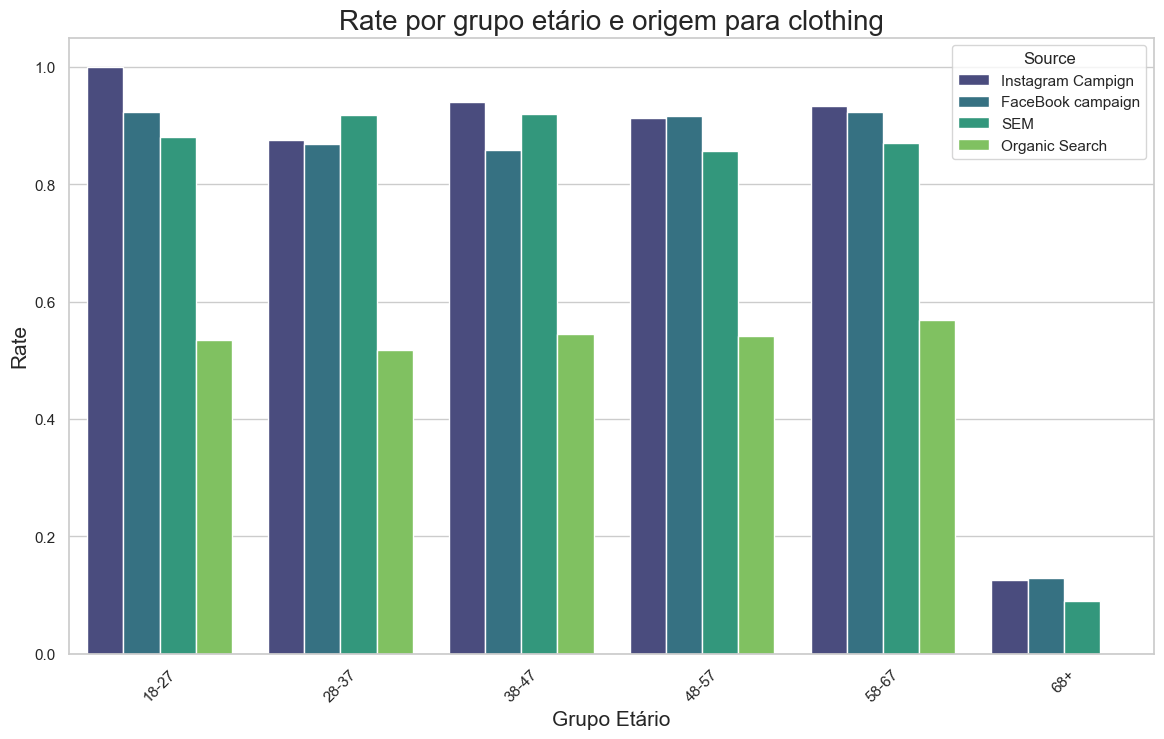

In [153]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
chart = sns.barplot(
    x="age_group", 
    y="Rate", 
    hue="Source", 
    data=clothing_agrupados, 
    palette="viridis"
)

chart.set_title('Rate por grupo etário e origem para clothing', fontsize=20)
chart.set_xlabel('Grupo Etário', fontsize=15)
chart.set_ylabel('Rate', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Conclusões

Com base na análise da tabelas ANOVA, podemos extrair as seguintes conclusões sobre os produtos de todas as categorias:

* **Hipótese 1: Gênero:** O gênero do comprador não influencia significativamente o valor gasto.
* **Hipótese 2: Origem da compra:** A origem da compra não demonstra relevância estatística em relação ao valor gasto individual.
* **Hipótese 3: Faixa etária:** A faixa etária do comprador apresenta alta correlação com o valor gasto na compra.
* **Hipótese 4: Grupo Ideal:** Existe um grupo ideal para obter o melhor valor possível.

## Conclusão final

Embora a origem não impacte diretamente o valor da compra total individual, ela impacta diretamente o valor gerado. Isso ocorre porque existem fontes que realizam uma maior quantidade de vendas do que outras. Portanto, ao multiplicarmos a mediana do valor gasto das compras por origem pela quantidade de compras realizadas nessa origem, pode-se observar que a origem possui influência significativa nas vendas.

Assim, após a análise das quatro hipóteses para todos os tipos de produtos, podemos observar que o gênero não é estatisticamente relevante para as vendas e que as características mais importantes são, respectivamente, a faixa etária e a origem da compra do usuário, a fim de obter o maior valor total possível em vendas.
